<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import requests

#### lire le dataset 

In [20]:
path ='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'

In [21]:
def download(url, filename):
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, 'wb') as f:
            f.write(response.content)
    else:
        print('Erreur de chargement', response.status_code)

In [22]:
download(path, 'boston_housing.csv')

#### Ajoutez votre code ci-dessous en suivant les instructions données dans le cours pour compléter le devoir évalué par les pairs


In [23]:
boston_df = pd.read_csv('boston_housing.csv')

In [24]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


# 1- Pour la "Valeur médiane des logements occupés par leur propriétaire", fournissez un diagramme en boîte

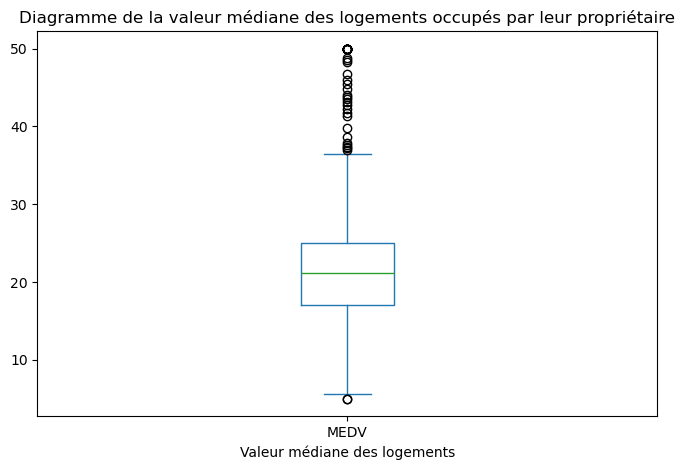

In [25]:
boston_df['MEDV'].plot(kind='box', figsize=(8,5))

# ajouter un titre au graphique
pyplot.title('Diagramme de la valeur médiane des logements occupés par leur propriétaire')

# ajout de x - label
pyplot.xlabel('Valeur médiane des logements')

# afficher le graphique
pyplot.show()

<b>Remarque :</b> sur le diagramme en boite des valeurs médianes des logements 
- la médiane est d'environ 20
- le 1er quartile est autour de 15
- 3e quartile est autour de 25
on observe également les données regroupés au centre. Ce qui indique une concentration centrale.
on constate des valeurs abbérantes. c'est à dire des données très élevés ou très faibles par rapport au restent. 

# 2- Fournissez un diagramme à barres pour la variable Charles river

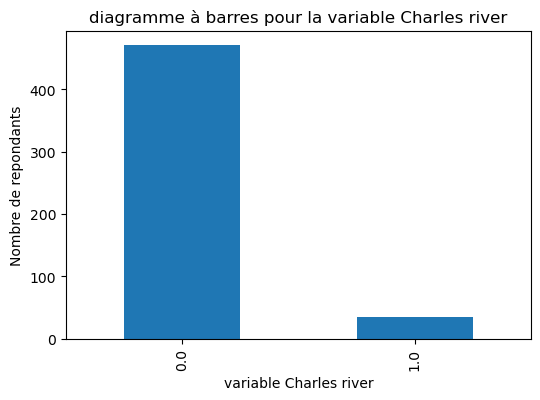

In [26]:
# Compter le nombre de 0 et 1 
count_chas = boston_df['CHAS'].value_counts().sort_index()

# Création du graphique en barre 
count_chas.plot(kind='bar', figsize=(6,4))

# afficher  le x-label
pyplot.xlabel('variable Charles river')

# afficher le y-label
pyplot.ylabel('Nombre de repondants')

# afficher le titre du graphique
pyplot.title('diagramme à barres pour la variable Charles river')

# afficher le graphique
pyplot.show()

<b>Remarque : </b> On remarque la grande majorité des parcelles ne sont pas situé le long de la rivière. Seules environ 7% sont à proximité de la rivière contre 93% qui ne le sont pas. 

# 3- Fournissez un diagramme en boîte pour la variable MEDV par rapport à la variable AGE. (Discrétisez la variable âge en trois groupes : 35 ans et moins, entre 35 et 70 ans et 70 ans et plus)

In [27]:
boston_df.loc[(boston_df['AGE'] <= 35), 'AGE_GROUP'] = '35 ans et moins'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'AGE_GROUP'] = 'Entre 35 et 70 ans'
boston_df.loc[(boston_df['AGE'] >= 70), 'AGE_GROUP'] = '70 ans et plus'

Text(0, 0.5, 'Valeur médiane des logements (MEDV)')

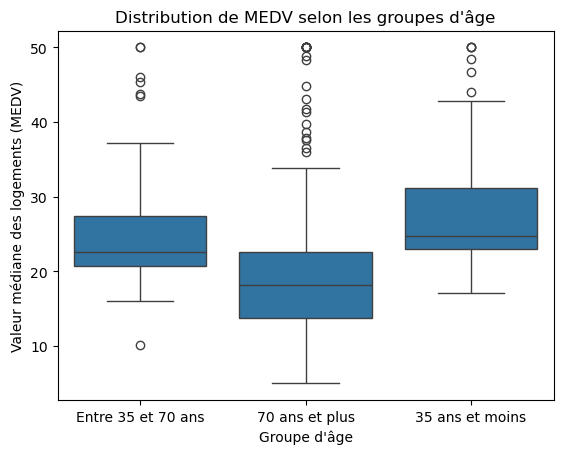

In [28]:
ax = sns.boxplot(x='AGE_GROUP', y='MEDV', data= boston_df)

# affichage des titres et labels
pyplot.title("Distribution de MEDV selon les groupes d'âge")
pyplot.xlabel("Groupe d'âge")
pyplot.ylabel("Valeur médiane des logements (MEDV)")

#### <b>Pour le groupe d'âge 35 ans et moins :</b>
* la médiane de la valeur des logements est d'environ 25.
* le 1er quartile (25% de la valeur minimale) est autour de 20.
* le 3e quartile (75% de la valeur minimale) est autour de 30.
les valeurs de ce groupe sont plus élevées comparé aux autres.
On remarque quelques valeurs extrèmes au dessus de la boite.

#### <b>Pour le groupe d'âge 35 et 70 ans :</b>
* la médiane de la valeur des logements est d'environ 23.
* le 1er quartile (25% de la valeur minimale) est autour de 20.
* le 3e quartile (75% de la valeur minimale) est autour de 25.
les valeurs de ce groupe sont moins élevées que le groupe de 35 ans et moins.
On remarque également quelques valeurs extrèmes au dessus et en dessous de la boite.

#### <b>Pour le groupe d'âge 70 ans et plus :</b>
* la médiane de la valeur des logements est d'environ 20.
* le 1er quartile (25% de la valeur minimale) est autour de 15.
* le 3e quartile (75% de la valeur minimale) est autour de 25.
les valeurs de ce groupe sont plus basses que les autres.
On remarque également quelques valeurs extrèmes au dessus de la boite.

# 4-Fournissez un diagramme de dispersion pour montrer la relation entre les concentrations d'oxyde nitrique et la proportion d'hectares de commerces autres que de détail par ville. Que pouvez-vous dire de cette relation 

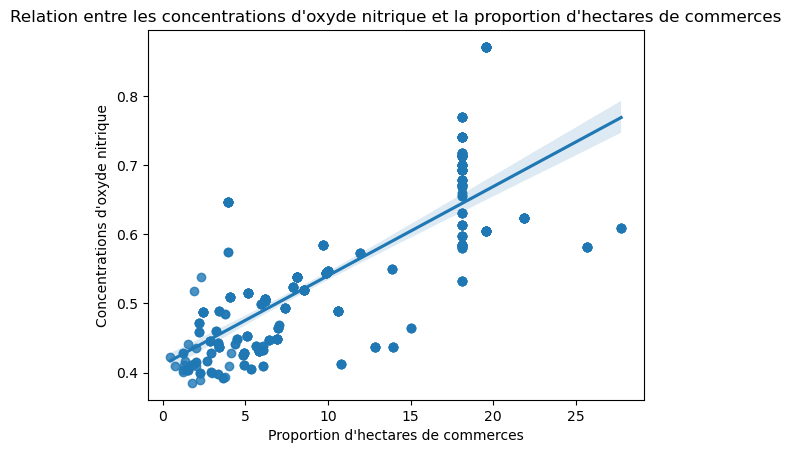

In [29]:
sns.regplot(x='INDUS', y='NOX', data=boston_df)

# afficher le titre du graphique
pyplot.title("Relation entre les concentrations d'oxyde nitrique et la proportion d'hectares de commerces")
pyplot.xlabel("Proportion d'hectares de commerces")
pyplot.ylabel("Concentrations d'oxyde nitrique")

# afficher le graphique
pyplot.show()

In [30]:
boston_df[['INDUS', 'NOX']].corr()

,INDUS,NOX
INDUS,1.000000,0.763651
NOX,0.763651,1.000000


<b>Remarque :</b> On constate sur le graphique que plus la proportion d'hectares de commerces augmente la concentration d'oxyde nitrique augmente aussi. Donc en s'appuyant sur le calcul de corrélation je peux affirmer qu'il y a bien une forte relation positive entre les deux variables.

# 5- Créez un histogramme pour la variable "ratio élèves/enseignants"

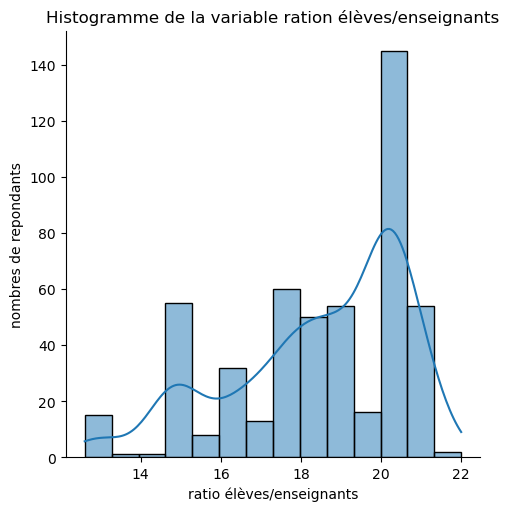

In [31]:
sns.displot(boston_df['PTRATIO'], kde = True)

# afficher le titre 
pyplot.title("Histogramme de la variable ration élèves/enseignants")
pyplot.xlabel("ratio élèves/enseignants")
pyplot.ylabel("nombres de repondants")

# afficher le graphique
pyplot.show()

<b>Remarque : </b> La majorité des données est regroupée entre 15 et 22, avec un pic entre l'intervalle 20 à 22. Ce qui signifie que cette plage est plus représenté dans la distribution. On remarque également que les données sont concentrés vers la gauche avec une fréquence décroissante vers la droite. Cela veut dire qu'il y a une asymétrie légère vers la droite.

# <b>Tests d'hypothèses</b>

# •	Existe-t-il une différence significative dans la valeur médiane des maisons bordées par la rivière Charles ou non ? (Test T pour les échantillons indépendants)

Énoncez l'hypothèse
* $H_0: µ_1 = µ_2$ ("Il n’y a aucune différence dans la moyenne de la valeur des maisons bordées par la rivière charles ou non")
* $H_1: µ_1 ≠ µ_2$ ("Il y a une différence dans la moyenne de la valeur des maisons bordées par la rivière charles ou non")

On peut utiliser le test de Levene en Python pour vérifier la significativité du test.

α = 0,05

In [33]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0.0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1.0]['MEDV'], center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

<b>Observation :</b> Puisque la p-value est inférieure à 0,05, on rejete l’hypothèse d’égalité des variances

Utilisez la fonction ttest_ind de la bibliothèque scipy.stats

In [34]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0.0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1.0]['MEDV'], equal_var = False)

TtestResult(statistic=-3.113291312794837, pvalue=0.0035671700981375174, df=36.876408797611994)

<b>Conclusion :</b> Puisque la p-value est inférieure à 0,05, nous rejetons l'hypothèse nulle, car il y a suffisamment de preuves qu'il existe une différence significative dans la moyenne de la valeur des maisons (MEDV) entre les quartiers bordés par la rivière Charles et ceux qui ne le sont pas.

# •	Y a-t-il une différence dans les valeurs médianes des maisons (MEDV) pour chaque proportion d'unités occupées par le propriétaire et construites avant 1940 (AGE) ? (ANOVA)

Énoncez l'hypothèse
* $H_0: µ_1 = µ_2 = µ_3$ (Les trois moyennes des populations sont égales)
* $H_1:$ Au moins une des moyennes est différente

Test d’égalité des variances

In [35]:
scipy.stats.levene(boston_df[boston_df['AGE_GROUP'] == '35 ans et moins']['MEDV'],
                   boston_df[boston_df['AGE_GROUP'] == 'Entre 35 et 70 ans']['MEDV'], 
                   boston_df[boston_df['AGE_GROUP'] == '70 ans et plus']['MEDV'], 
                   center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

<b>Observation :</b> Puisque P-value est supérieure à 0,05 on ne rejette pas l'hypothèse nulle, les variances sont égales

Nous allons séparer les trois échantillons 

In [40]:
trente_cinq_moins = boston_df[boston_df['AGE_GROUP'] == '35 ans et moins']['MEDV']
trente_cinq_soixante_dix = boston_df[boston_df['AGE_GROUP'] == 'Entre 35 et 70 ans']['MEDV']
soixante_dix_plus = boston_df[boston_df['AGE_GROUP'] == '70 ans et plus']['MEDV']

Faire l'ANOVA

In [41]:
f_statistic, p_value = scipy.stats.f_oneway(trente_cinq_moins, trente_cinq_soixante_dix, soixante_dix_plus)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


<b>Conclusion :</b> Comme la valeur p est inférieure à 0,05, nous rejetons l'hypothèse nulle car il existe des preuves significatives qu'au moins une des valeurs est différente

# •	Peut-on conclure qu'il n'y a pas de relation entre les concentrations d'oxyde nitrique et la proportion d'hectares de commerces autres que de détail par ville (corrélation de Pearson) ?

Énoncez l'hypothèse
* $H_0:$ La concentration d'oxyde nitrique n'est pas corrélé avec la proportion d'hectares de commerces
* $H_1:$ La concentration d'oxyde nitrique est corrélé avec la proportion d'hectares de commerces

In [45]:
scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])

PearsonRResult(statistic=0.763651446920915, pvalue=7.913361061241167e-98)

<b>Conclusion :</b> Puisque la p-value est inférieure 0,05, nous rejettons l'hypothèse nulle. Il existe une corrélation positive forte et statistiquement significative entre la concentration d’oxyde nitrique (NOX) et la proportion d’hectares de commerces autres que de détail (INDUS).

# •	Quel est l'impact d'une distance pondérée supplémentaire par rapport aux cinq centres d'emploi de Boston sur la valeur médiane des maisons occupées par leur propriétaire ? (Analyse de régression)

Formulez l’hypothèse :
* $H_0: µ1 = µ2 = µ3$ (Les trois moyennes sont égales)
* $H_1:$ Au moins une des moyennes est différente

In [50]:
# X variables indépendants
x = boston_df['DIS']
# Y variables dépendants
y = boston_df['MEDV']
## ajouter une constante (bêta_0) à notre modèle
x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x)

# afficher les statistiques
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 22 Jul 2025   Prob (F-statistic):           1.21e-08
Time:                        23:15:56   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<b>Conclusion :</b> Puisque la p-value associée au coefficient de la variable DIS est inférieure à 0,05, nous rejetons l’hypothèse nulle selon laquelle il n’y a aucune relation entre DIS et MEDV.

Nous concluons donc qu’il existe une relation linéaire statistiquement significative entre la distance pondérée (DIS) et la valeur médiane des maisons (MEDV).
